# Import and Read Data

In [1]:
import gzip
import csv
import json
import pandas as pd
import numpy as np


data = pd.read_csv('HistoricalOutage.csv')
print(data)

      YEAR  MONTH    U.S._STATE POSTAL.CODE NERC.REGION      CLIMATE.REGION  \
0     2011    7.0     Minnesota          MN         MRO  East North Central   
1     2014    5.0     Minnesota          MN         MRO  East North Central   
2     2010   10.0     Minnesota          MN         MRO  East North Central   
3     2012    6.0     Minnesota          MN         MRO  East North Central   
4     2015    7.0     Minnesota          MN         MRO  East North Central   
...    ...    ...           ...         ...         ...                 ...   
1529  2011   12.0  North Dakota          ND         MRO  West North Central   
1530  2006    NaN  North Dakota          ND         MRO  West North Central   
1531  2009    8.0  South Dakota          SD         RFC  West North Central   
1532  2009    8.0  South Dakota          SD         MRO  West North Central   
1533  2000    NaN        Alaska          AK        ASCC                 NaN   

      ANOMALY.LEVEL CLIMATE.CATEGORY          OUTAG

In [2]:
!pip install seaborn


[notice] A new release of pip is available: 23.1.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Investigate and Clean Data

In [3]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x) ## This is done to avoid exponential numbers 
print(data)

      YEAR  MONTH    U.S._STATE POSTAL.CODE NERC.REGION      CLIMATE.REGION  \
0     2011   7.00     Minnesota          MN         MRO  East North Central   
1     2014   5.00     Minnesota          MN         MRO  East North Central   
2     2010  10.00     Minnesota          MN         MRO  East North Central   
3     2012   6.00     Minnesota          MN         MRO  East North Central   
4     2015   7.00     Minnesota          MN         MRO  East North Central   
...    ...    ...           ...         ...         ...                 ...   
1529  2011  12.00  North Dakota          ND         MRO  West North Central   
1530  2006    NaN  North Dakota          ND         MRO  West North Central   
1531  2009   8.00  South Dakota          SD         RFC  West North Central   
1532  2009   8.00  South Dakota          SD         MRO  West North Central   
1533  2000    NaN        Alaska          AK        ASCC                 NaN   

      ANOMALY.LEVEL CLIMATE.CATEGORY          OUTAG

In [4]:
data.shape[0]

1534

In [5]:
data.isnull()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,OUTAGE.START.TIME,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1530,False,True,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1531,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1532,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum() # Indentify null values in data set

YEAR                          0
MONTH                         9
U.S._STATE                    0
POSTAL.CODE                   0
NERC.REGION                   0
CLIMATE.REGION                6
ANOMALY.LEVEL                 9
CLIMATE.CATEGORY              9
OUTAGE.START.DATE             9
OUTAGE.START.TIME             9
OUTAGE.RESTORATION.DATE      58
OUTAGE.RESTORATION.TIME      58
CAUSE.CATEGORY                0
CAUSE.CATEGORY.DETAIL       471
HURRICANE.NAMES            1462
OUTAGE.DURATION              58
DEMAND.LOSS.MW              705
CUSTOMERS.AFFECTED          443
RES.PRICE                    22
COM.PRICE                    22
IND.PRICE                    22
TOTAL.PRICE                  22
RES.SALES                    22
COM.SALES                    22
IND.SALES                    22
TOTAL.SALES                  22
RES.PERCEN                   22
COM.PERCEN                   22
IND.PERCEN                   22
RES.CUSTOMERS                 0
COM.CUSTOMERS                 0
IND.CUST

In [7]:
data.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,OUTAGE.START.TIME,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,2011,7.00,Minnesota,MN,MRO,East North Central,-0.30,normal,"Friday, July 1, 2011",5:00:00 PM,...,73.27,15.28,2279.00,1700.50,18.20,2.14,0.60,91.59,8.41,5.48
1,2014,5.00,Minnesota,MN,MRO,East North Central,-0.10,normal,"Sunday, May 11, 2014",6:38:00 PM,...,73.27,15.28,2279.00,1700.50,18.20,2.14,0.60,91.59,8.41,5.48
2,2010,10.00,Minnesota,MN,MRO,East North Central,-1.50,cold,"Tuesday, October 26, 2010",8:00:00 PM,...,73.27,15.28,2279.00,1700.50,18.20,2.14,0.60,91.59,8.41,5.48
3,2012,6.00,Minnesota,MN,MRO,East North Central,-0.10,normal,"Tuesday, June 19, 2012",4:30:00 AM,...,73.27,15.28,2279.00,1700.50,18.20,2.14,0.60,91.59,8.41,5.48
4,2015,7.00,Minnesota,MN,MRO,East North Central,1.20,warm,"Saturday, July 18, 2015",2:00:00 AM,...,73.27,15.28,2279.00,1700.50,18.20,2.14,0.60,91.59,8.41,5.48


Remove Data Features which will not be used

In [8]:
data = data.drop(['HURRICANE.NAMES', 'RES.PRICE','IND.PRICE', 'TOTAL.PRICE', 'RES.SALES', 'COM.SALES', 'IND.SALES', 'TOTAL.SALES', 'RES.PERCEN', 'COM.PERCEN'
,'IND.PERCEN'
,'RES.CUSTOMERS'
,'COM.CUSTOMERS'  
,'IND.CUSTOMERS'
,'TOTAL.CUSTOMERS'
,'RES.CUST.PCT'
,'COM.CUST.PCT'
,'IND.CUST.PCT'
,'PC.REALGSP.STATE'
,'PC.REALGSP.USA'
,'PC.REALGSP.REL'
,'PC.REALGSP.CHANGE'
,'UTIL.REALGSP'
,'TOTAL.REALGSP'
,'UTIL.CONTRI'
,'PI.UTIL.OFUSA'
,'POPULATION'
,'POPPCT_URBAN'
,'POPPCT_UC'
,'POPDEN_URBAN'
,'POPDEN_UC'
,'POPDEN_RURAL'
,'AREAPCT_URBAN'
,'AREAPCT_UC'
,'PCT_LAND' 
,'PCT_WATER_TOT'
,'PCT_WATER_INLAND'
,'CAUSE.CATEGORY.DETAIL'
                 ],
                       axis = 1)

In [9]:
data.shape[0]

1534

In [10]:
cnt = data.count
print(cnt)

<bound method DataFrame.count of       YEAR  MONTH    U.S._STATE POSTAL.CODE NERC.REGION      CLIMATE.REGION  \
0     2011   7.00     Minnesota          MN         MRO  East North Central   
1     2014   5.00     Minnesota          MN         MRO  East North Central   
2     2010  10.00     Minnesota          MN         MRO  East North Central   
3     2012   6.00     Minnesota          MN         MRO  East North Central   
4     2015   7.00     Minnesota          MN         MRO  East North Central   
...    ...    ...           ...         ...         ...                 ...   
1529  2011  12.00  North Dakota          ND         MRO  West North Central   
1530  2006    NaN  North Dakota          ND         MRO  West North Central   
1531  2009   8.00  South Dakota          SD         RFC  West North Central   
1532  2009   8.00  South Dakota          SD         MRO  West North Central   
1533  2000    NaN        Alaska          AK        ASCC                 NaN   

      ANOMALY.LEVE

In [11]:
len(data.index)

1534

In [12]:
data['CUSTOMERS.AFFECTED'].describe()

count      1091.00
mean     143456.22
std      286986.30
min           0.00
25%        9650.00
50%       70135.00
75%      150000.00
max     3241437.00
Name: CUSTOMERS.AFFECTED, dtype: float64

In [13]:
data.isnull().sum()

YEAR                         0
MONTH                        9
U.S._STATE                   0
POSTAL.CODE                  0
NERC.REGION                  0
CLIMATE.REGION               6
ANOMALY.LEVEL                9
CLIMATE.CATEGORY             9
OUTAGE.START.DATE            9
OUTAGE.START.TIME            9
OUTAGE.RESTORATION.DATE     58
OUTAGE.RESTORATION.TIME     58
CAUSE.CATEGORY               0
OUTAGE.DURATION             58
DEMAND.LOSS.MW             705
CUSTOMERS.AFFECTED         443
COM.PRICE                   22
dtype: int64

In [14]:
data = data.dropna(axis=0, subset=['OUTAGE.RESTORATION.DATE', 'OUTAGE.RESTORATION.TIME'])

In [15]:
data.fillna(data['OUTAGE.DURATION'].median(), inplace = True)

C:\Users\SamCr\AppData\Local\Temp\ipykernel_3820\2074654696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data['OUTAGE.DURATION'].median(), inplace = True)


In [16]:
data.fillna(data['DEMAND.LOSS.MW'].median(), inplace = True)

C:\Users\SamCr\AppData\Local\Temp\ipykernel_3820\3212402996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data['DEMAND.LOSS.MW'].median(), inplace = True)


In [17]:
data.fillna(data['CUSTOMERS.AFFECTED'].median(), inplace = True)

C:\Users\SamCr\AppData\Local\Temp\ipykernel_3820\372089650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data['CUSTOMERS.AFFECTED'].median(), inplace = True)


In [18]:
data = data.drop(['COM.PRICE'], axis = 1)

In [19]:
data.drop(data[data['CLIMATE.REGION'] == '679.0'].index)

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,OUTAGE.START.TIME,OUTAGE.RESTORATION.DATE,OUTAGE.RESTORATION.TIME,CAUSE.CATEGORY,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED
0,2011,7.00,Minnesota,MN,MRO,East North Central,-0.30,normal,"Friday, July 1, 2011",5:00:00 PM,"Sunday, July 3, 2011",8:00:00 PM,severe weather,3060.00,701.00,70000.00
1,2014,5.00,Minnesota,MN,MRO,East North Central,-0.10,normal,"Sunday, May 11, 2014",6:38:00 PM,"Sunday, May 11, 2014",6:39:00 PM,intentional attack,1.00,701.00,701.00
2,2010,10.00,Minnesota,MN,MRO,East North Central,-1.50,cold,"Tuesday, October 26, 2010",8:00:00 PM,"Thursday, October 28, 2010",10:00:00 PM,severe weather,3000.00,701.00,70000.00
3,2012,6.00,Minnesota,MN,MRO,East North Central,-0.10,normal,"Tuesday, June 19, 2012",4:30:00 AM,"Wednesday, June 20, 2012",11:00:00 PM,severe weather,2550.00,701.00,68200.00
4,2015,7.00,Minnesota,MN,MRO,East North Central,1.20,warm,"Saturday, July 18, 2015",2:00:00 AM,"Sunday, July 19, 2015",7:00:00 AM,severe weather,1740.00,250.00,250000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,2016,3.00,Idaho,ID,WECC,Northwest,1.60,warm,"Tuesday, March 8, 2016",12:00:00 AM,"Tuesday, March 8, 2016",12:00:00 AM,intentional attack,0.00,0.00,0.00
1528,2016,7.00,Idaho,ID,WECC,Northwest,-0.30,normal,"Tuesday, July 19, 2016",3:45:00 PM,"Tuesday, July 19, 2016",7:25:00 PM,system operability disruption,220.00,485.00,701.00
1529,2011,12.00,North Dakota,ND,MRO,West North Central,-0.90,cold,"Tuesday, December 6, 2011",8:00:00 AM,"Tuesday, December 6, 2011",8:00:00 PM,public appeal,720.00,155.00,34500.00
1531,2009,8.00,South Dakota,SD,RFC,West North Central,0.50,warm,"Saturday, August 29, 2009",10:54:00 PM,"Saturday, August 29, 2009",11:53:00 PM,islanding,59.00,84.00,701.00


In [20]:
data.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,OUTAGE.START.TIME,OUTAGE.RESTORATION.DATE,OUTAGE.RESTORATION.TIME,CAUSE.CATEGORY,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED
0,2011,7.00,Minnesota,MN,MRO,East North Central,-0.30,normal,"Friday, July 1, 2011",5:00:00 PM,"Sunday, July 3, 2011",8:00:00 PM,severe weather,3060.00,701.00,70000.00
1,2014,5.00,Minnesota,MN,MRO,East North Central,-0.10,normal,"Sunday, May 11, 2014",6:38:00 PM,"Sunday, May 11, 2014",6:39:00 PM,intentional attack,1.00,701.00,701.00
2,2010,10.00,Minnesota,MN,MRO,East North Central,-1.50,cold,"Tuesday, October 26, 2010",8:00:00 PM,"Thursday, October 28, 2010",10:00:00 PM,severe weather,3000.00,701.00,70000.00
3,2012,6.00,Minnesota,MN,MRO,East North Central,-0.10,normal,"Tuesday, June 19, 2012",4:30:00 AM,"Wednesday, June 20, 2012",11:00:00 PM,severe weather,2550.00,701.00,68200.00
4,2015,7.00,Minnesota,MN,MRO,East North Central,1.20,warm,"Saturday, July 18, 2015",2:00:00 AM,"Sunday, July 19, 2015",7:00:00 AM,severe weather,1740.00,250.00,250000.00


In [21]:
data.shape[0]

1476

In [22]:
desc = data['CUSTOMERS.AFFECTED'].describe()
print(desc)

count      1476.00
mean     103307.62
std      252113.78
min           0.00
25%         701.00
50%       35115.00
75%      115125.00
max     3241437.00
Name: CUSTOMERS.AFFECTED, dtype: float64


In [23]:
data.isnull().sum()

YEAR                       0
MONTH                      0
U.S._STATE                 0
POSTAL.CODE                0
NERC.REGION                0
CLIMATE.REGION             0
ANOMALY.LEVEL              0
CLIMATE.CATEGORY           0
OUTAGE.START.DATE          0
OUTAGE.START.TIME          0
OUTAGE.RESTORATION.DATE    0
OUTAGE.RESTORATION.TIME    0
CAUSE.CATEGORY             0
OUTAGE.DURATION            0
DEMAND.LOSS.MW             0
CUSTOMERS.AFFECTED         0
dtype: int64

In [24]:
data = data.drop(['POSTAL.CODE', 'NERC.REGION' ], axis = 1)

In [25]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1526    False
1528    False
1529    False
1531    False
1532    False
Length: 1476, dtype: bool

In [26]:
data.drop_duplicates()

,YEAR,MONTH,U.S._STATE,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,OUTAGE.START.TIME,OUTAGE.RESTORATION.DATE,OUTAGE.RESTORATION.TIME,CAUSE.CATEGORY,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED
0,2011,7.00,Minnesota,East North Central,-0.30,normal,"Friday, July 1, 2011",5:00:00 PM,"Sunday, July 3, 2011",8:00:00 PM,severe weather,3060.00,701.00,70000.00
1,2014,5.00,Minnesota,East North Central,-0.10,normal,"Sunday, May 11, 2014",6:38:00 PM,"Sunday, May 11, 2014",6:39:00 PM,intentional attack,1.00,701.00,701.00
2,2010,10.00,Minnesota,East North Central,-1.50,cold,"Tuesday, October 26, 2010",8:00:00 PM,"Thursday, October 28, 2010",10:00:00 PM,severe weather,3000.00,701.00,70000.00
3,2012,6.00,Minnesota,East North Central,-0.10,normal,"Tuesday, June 19, 2012",4:30:00 AM,"Wednesday, June 20, 2012",11:00:00 PM,severe weather,2550.00,701.00,68200.00
4,2015,7.00,Minnesota,East North Central,1.20,warm,"Saturday, July 18, 2015",2:00:00 AM,"Sunday, July 19, 2015",7:00:00 AM,severe weather,1740.00,250.00,250000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,2016,3.00,Idaho,Northwest,1.60,warm,"Tuesday, March 8, 2016",12:00:00 AM,"Tuesday, March 8, 2016",12:00:00 AM,intentional attack,0.00,0.00,0.00
1528,2016,7.00,Idaho,Northwest,-0.30,normal,"Tuesday, July 19, 2016",3:45:00 PM,"Tuesday, July 19, 2016",7:25:00 PM,system operability disruption,220.00,485.00,701.00
1529,2011,12.00,North Dakota,West North Central,-0.90,cold,"Tuesday, December 6, 2011",8:00:00 AM,"Tuesday, December 6, 2011",8:00:00 PM,public appeal,720.00,155.00,34500.00
1531,2009,8.00,South Dakota,West North Central,0.50,warm,"Saturday, August 29, 2009",10:54:00 PM,"Saturday, August 29, 2009",11:53:00 PM,islanding,59.00,84.00,701.00


In [27]:
data.dtypes

YEAR                         int64
MONTH                      float64
U.S._STATE                  object
CLIMATE.REGION              object
ANOMALY.LEVEL              float64
CLIMATE.CATEGORY            object
OUTAGE.START.DATE           object
OUTAGE.START.TIME           object
OUTAGE.RESTORATION.DATE     object
OUTAGE.RESTORATION.TIME     object
CAUSE.CATEGORY              object
OUTAGE.DURATION            float64
DEMAND.LOSS.MW             float64
CUSTOMERS.AFFECTED         float64
dtype: object

In [28]:
data = data.drop(['OUTAGE.START.DATE', 'OUTAGE.START.TIME', 'OUTAGE.RESTORATION.DATE', 'OUTAGE.RESTORATION.TIME'], axis = 1)

In [29]:
data.dtypes

YEAR                    int64
MONTH                 float64
U.S._STATE             object
CLIMATE.REGION         object
ANOMALY.LEVEL         float64
CLIMATE.CATEGORY       object
CAUSE.CATEGORY         object
OUTAGE.DURATION       float64
DEMAND.LOSS.MW        float64
CUSTOMERS.AFFECTED    float64
dtype: object

In [30]:
data.info

<bound method DataFrame.info of       YEAR  MONTH    U.S._STATE      CLIMATE.REGION  ANOMALY.LEVEL  \
0     2011   7.00     Minnesota  East North Central          -0.30   
1     2014   5.00     Minnesota  East North Central          -0.10   
2     2010  10.00     Minnesota  East North Central          -1.50   
3     2012   6.00     Minnesota  East North Central          -0.10   
4     2015   7.00     Minnesota  East North Central           1.20   
...    ...    ...           ...                 ...            ...   
1526  2016   3.00         Idaho           Northwest           1.60   
1528  2016   7.00         Idaho           Northwest          -0.30   
1529  2011  12.00  North Dakota  West North Central          -0.90   
1531  2009   8.00  South Dakota  West North Central           0.50   
1532  2009   8.00  South Dakota  West North Central           0.50   

     CLIMATE.CATEGORY                 CAUSE.CATEGORY  OUTAGE.DURATION  \
0              normal                 severe weather  

In [31]:
len(data)

1476

In [32]:
with pd.option_context('display.max_rows', 500, 'display.max_columns', 30):  # more options can be specified also
    print(data)

      YEAR  MONTH    U.S._STATE      CLIMATE.REGION  ANOMALY.LEVEL  \
0     2011   7.00     Minnesota  East North Central          -0.30   
1     2014   5.00     Minnesota  East North Central          -0.10   
2     2010  10.00     Minnesota  East North Central          -1.50   
3     2012   6.00     Minnesota  East North Central          -0.10   
4     2015   7.00     Minnesota  East North Central           1.20   
...    ...    ...           ...                 ...            ...   
1526  2016   3.00         Idaho           Northwest           1.60   
1528  2016   7.00         Idaho           Northwest          -0.30   
1529  2011  12.00  North Dakota  West North Central          -0.90   
1531  2009   8.00  South Dakota  West North Central           0.50   
1532  2009   8.00  South Dakota  West North Central           0.50   

     CLIMATE.CATEGORY                 CAUSE.CATEGORY  OUTAGE.DURATION  \
0              normal                 severe weather          3060.00   
1            

In [33]:
data.count()

YEAR                  1476
MONTH                 1476
U.S._STATE            1476
CLIMATE.REGION        1476
ANOMALY.LEVEL         1476
CLIMATE.CATEGORY      1476
CAUSE.CATEGORY        1476
OUTAGE.DURATION       1476
DEMAND.LOSS.MW        1476
CUSTOMERS.AFFECTED    1476
dtype: int64

In [34]:
desc = data['DEMAND.LOSS.MW'].describe()
print(desc)

count    1476.00
mean      615.15
std      1644.66
min         0.00
25%       150.00
50%       701.00
75%       701.00
max     41788.00
Name: DEMAND.LOSS.MW, dtype: float64


In [35]:
data['CUSTOMERS.AFFECTED'] = data['CUSTOMERS.AFFECTED'].astype(int)

In [36]:
data.dtypes

YEAR                    int64
MONTH                 float64
U.S._STATE             object
CLIMATE.REGION         object
ANOMALY.LEVEL         float64
CLIMATE.CATEGORY       object
CAUSE.CATEGORY         object
OUTAGE.DURATION       float64
DEMAND.LOSS.MW        float64
CUSTOMERS.AFFECTED      int32
dtype: object

In [37]:
data['CUSTOMERS.AFFECTED'].describe()

count      1476.00
mean     103307.62
std      252113.78
min           0.00
25%         701.00
50%       35115.00
75%      115125.00
max     3241437.00
Name: CUSTOMERS.AFFECTED, dtype: float64

In [38]:
import numpy as np

data['OUTAGE.SEVERITY'] = np.where((data['ANOMALY.LEVEL'] > -0.10) & (data['DEMAND.LOSS.MW'] > 1687), 'Major', 'Minor')


In [39]:
data.head()

,YEAR,MONTH,U.S._STATE,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,CAUSE.CATEGORY,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED,OUTAGE.SEVERITY
0,2011,7.00,Minnesota,East North Central,-0.30,normal,severe weather,3060.00,701.00,70000,Minor
1,2014,5.00,Minnesota,East North Central,-0.10,normal,intentional attack,1.00,701.00,701,Minor
2,2010,10.00,Minnesota,East North Central,-1.50,cold,severe weather,3000.00,701.00,70000,Minor
3,2012,6.00,Minnesota,East North Central,-0.10,normal,severe weather,2550.00,701.00,68200,Minor
4,2015,7.00,Minnesota,East North Central,1.20,warm,severe weather,1740.00,250.00,250000,Minor


In [40]:
data.info

<bound method DataFrame.info of       YEAR  MONTH    U.S._STATE      CLIMATE.REGION  ANOMALY.LEVEL  \
0     2011   7.00     Minnesota  East North Central          -0.30   
1     2014   5.00     Minnesota  East North Central          -0.10   
2     2010  10.00     Minnesota  East North Central          -1.50   
3     2012   6.00     Minnesota  East North Central          -0.10   
4     2015   7.00     Minnesota  East North Central           1.20   
...    ...    ...           ...                 ...            ...   
1526  2016   3.00         Idaho           Northwest           1.60   
1528  2016   7.00         Idaho           Northwest          -0.30   
1529  2011  12.00  North Dakota  West North Central          -0.90   
1531  2009   8.00  South Dakota  West North Central           0.50   
1532  2009   8.00  South Dakota  West North Central           0.50   

     CLIMATE.CATEGORY                 CAUSE.CATEGORY  OUTAGE.DURATION  \
0              normal                 severe weather  

In [41]:
data.count()

YEAR                  1476
MONTH                 1476
U.S._STATE            1476
CLIMATE.REGION        1476
ANOMALY.LEVEL         1476
CLIMATE.CATEGORY      1476
CAUSE.CATEGORY        1476
OUTAGE.DURATION       1476
DEMAND.LOSS.MW        1476
CUSTOMERS.AFFECTED    1476
OUTAGE.SEVERITY       1476
dtype: int64

In [42]:
data.drop(data[data['CLIMATE.REGION'] == '679.0'].index)

,YEAR,MONTH,U.S._STATE,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,CAUSE.CATEGORY,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED,OUTAGE.SEVERITY
0,2011,7.00,Minnesota,East North Central,-0.30,normal,severe weather,3060.00,701.00,70000,Minor
1,2014,5.00,Minnesota,East North Central,-0.10,normal,intentional attack,1.00,701.00,701,Minor
2,2010,10.00,Minnesota,East North Central,-1.50,cold,severe weather,3000.00,701.00,70000,Minor
3,2012,6.00,Minnesota,East North Central,-0.10,normal,severe weather,2550.00,701.00,68200,Minor
4,2015,7.00,Minnesota,East North Central,1.20,warm,severe weather,1740.00,250.00,250000,Minor
...,...,...,...,...,...,...,...,...,...,...,...
1526,2016,3.00,Idaho,Northwest,1.60,warm,intentional attack,0.00,0.00,0,Minor
1528,2016,7.00,Idaho,Northwest,-0.30,normal,system operability disruption,220.00,485.00,701,Minor
1529,2011,12.00,North Dakota,West North Central,-0.90,cold,public appeal,720.00,155.00,34500,Minor
1531,2009,8.00,South Dakota,West North Central,0.50,warm,islanding,59.00,84.00,701,Minor


In [43]:
data.value_counts("CLIMATE.REGION")

CLIMATE.REGION
Northeast             344
South                 218
West                  205
Central               191
Southeast             150
East North Central    137
Northwest             122
Southwest              88
West North Central     16
701.0                   5
dtype: int64

# Exploratory Data Analysis

Text(0.5, 1.0, 'Anomaly Level Histogram')

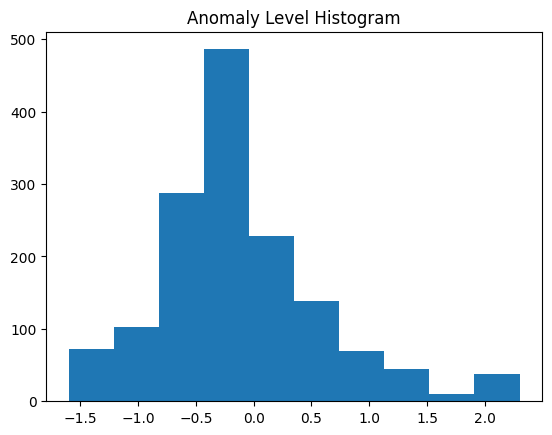

In [44]:
import matplotlib.pyplot as plt
plt.hist(data['ANOMALY.LEVEL'])
plt.title('Anomaly Level Histogram')

Text(0.5, 1.0, 'MONTH Histogram')

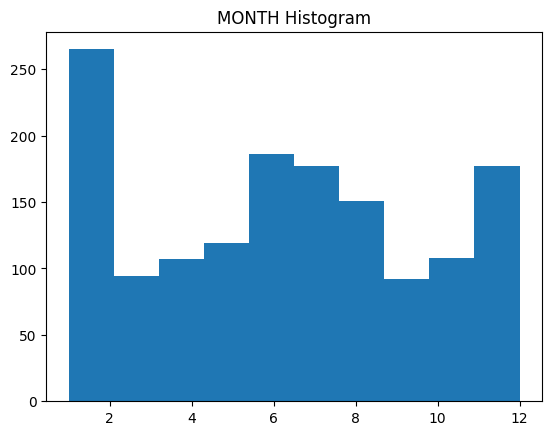

In [45]:
plt.hist(data['MONTH'])
plt.title('MONTH Histogram')

Text(0.5, 1.0, 'Customers Affected Histogram')

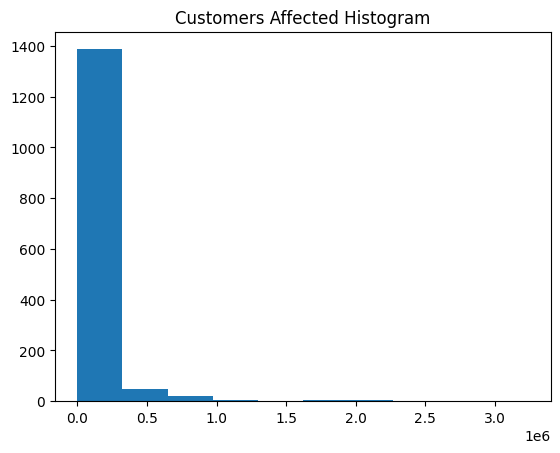

In [46]:
plt.hist(data['CUSTOMERS.AFFECTED'])
plt.title('Customers Affected Histogram')

<AxesSubplot:>

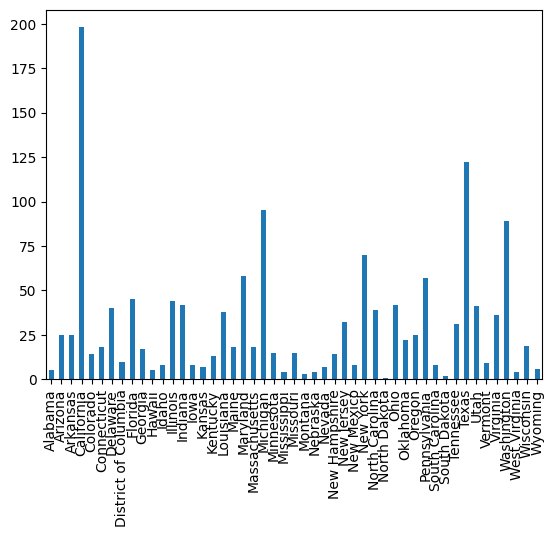

In [47]:
X = data.iloc[:, :-1]
y = data['U.S._STATE']
y.value_counts().sort_index().plot.bar(x='U.S._STATE', y='Number of Occurrences')



<AxesSubplot:>

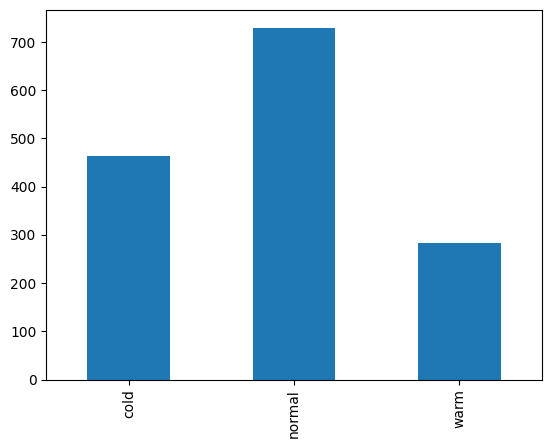

In [48]:
X = data.iloc[:, :-1]
y = data['CLIMATE.CATEGORY']
y.value_counts().sort_index().plot.bar(x='CLIMATE.CATEGORY', y='Number of Occurrences')

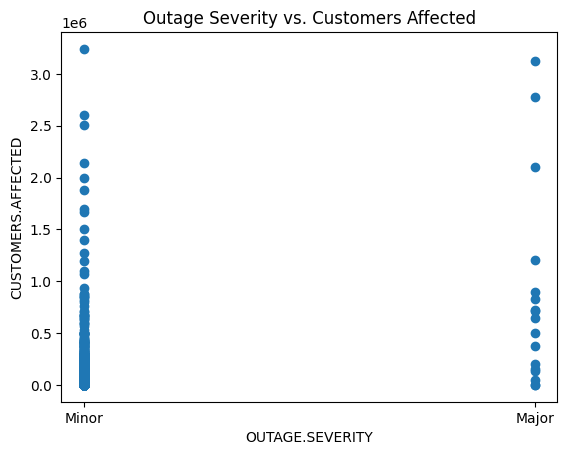

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' containing the relevant columns
# Replace 'data' with the actual DataFrame containing your data

# Scatter plot using 'OUTAGE.SEVERITY' and 'CUSTOMERS.AFFECTED' columns
plt.scatter(data['OUTAGE.SEVERITY'], data['CUSTOMERS.AFFECTED'])

# Set labels and title
plt.xlabel('OUTAGE.SEVERITY')
plt.ylabel('CUSTOMERS.AFFECTED')
plt.title('Outage Severity vs. Customers Affected')

# Show the plot
plt.show()

In [50]:
import pandas as pd


data_encoded = pd.get_dummies(data, columns=['CLIMATE.CATEGORY'])

<AxesSubplot:>

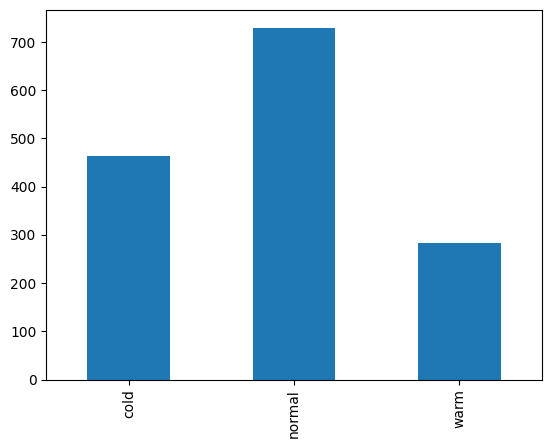

In [51]:
X = data.iloc[:, :-1]
y = data['CLIMATE.CATEGORY']
y.value_counts().sort_index().plot.bar(x='CLIMATE.CATEGORY', y='Number of Occurrences')

In [52]:
data.dtypes

YEAR                    int64
MONTH                 float64
U.S._STATE             object
CLIMATE.REGION         object
ANOMALY.LEVEL         float64
CLIMATE.CATEGORY       object
CAUSE.CATEGORY         object
OUTAGE.DURATION       float64
DEMAND.LOSS.MW        float64
CUSTOMERS.AFFECTED      int32
OUTAGE.SEVERITY        object
dtype: object

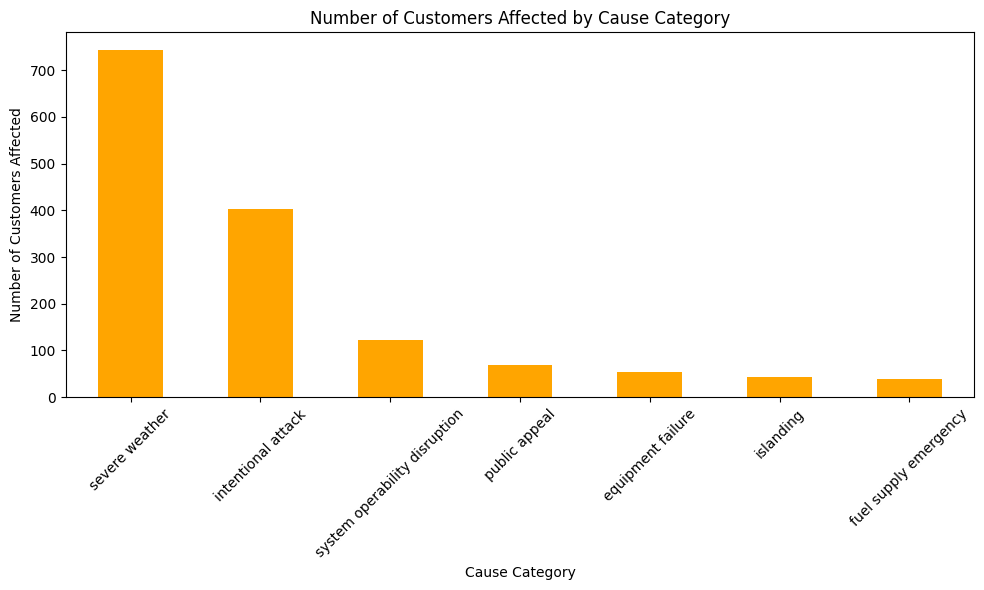

In [53]:

cause_category_counts = data['CAUSE.CATEGORY'].value_counts()


plt.figure(figsize=(10, 6))
cause_category_counts.plot(kind='bar', color = 'orange')
plt.xlabel('Cause Category')
plt.ylabel('Number of Customers Affected')
plt.title('Number of Customers Affected by Cause Category')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


In [54]:
import pandas as pd

value_mapping = {
    'cold': 1,
    'normal': 2,
    'warm': 3
}


data['CLIMATE.CATEGORY'] = data['CLIMATE.CATEGORY'].replace(value_mapping)

<AxesSubplot:>

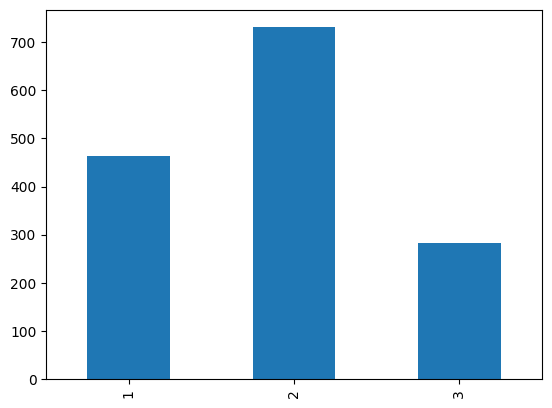

In [55]:
X = data.iloc[:, :-1]
y = data['CLIMATE.CATEGORY']
y.value_counts().sort_index().plot.bar(x='CLIMATE.CATEGORY', y='Number of Occurrences')

In [56]:
data.dtypes

YEAR                    int64
MONTH                 float64
U.S._STATE             object
CLIMATE.REGION         object
ANOMALY.LEVEL         float64
CLIMATE.CATEGORY        int64
CAUSE.CATEGORY         object
OUTAGE.DURATION       float64
DEMAND.LOSS.MW        float64
CUSTOMERS.AFFECTED      int32
OUTAGE.SEVERITY        object
dtype: object

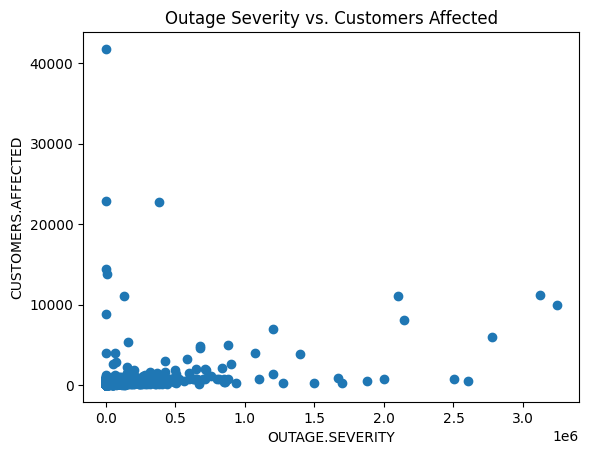

In [57]:
import pandas as pd
import matplotlib.pyplot as plt


plt.scatter(data['CUSTOMERS.AFFECTED'], data['DEMAND.LOSS.MW'])

# Set labels and title
plt.xlabel('OUTAGE.SEVERITY')
plt.ylabel('CUSTOMERS.AFFECTED')
plt.title('Outage Severity vs. Customers Affected')

# Show the plot
plt.show()

In [58]:
data['CUSTOMERS.AFFECTED'].describe()

count      1476.00
mean     103307.62
std      252113.78
min           0.00
25%         701.00
50%       35115.00
75%      115125.00
max     3241437.00
Name: CUSTOMERS.AFFECTED, dtype: float64

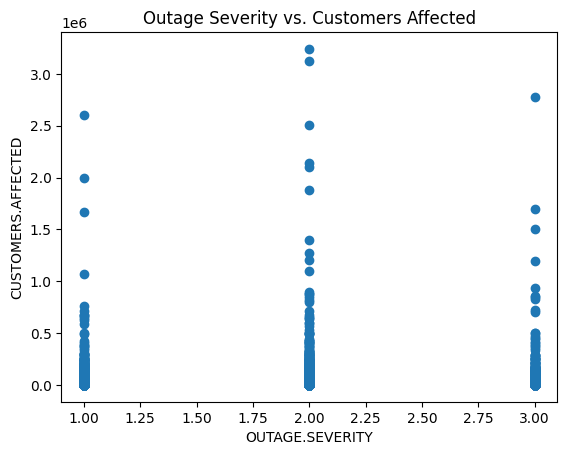

In [59]:




plt.scatter(data['CLIMATE.CATEGORY'], data['CUSTOMERS.AFFECTED'])

plt.xlabel('OUTAGE.SEVERITY')
plt.ylabel('CUSTOMERS.AFFECTED')
plt.title('Outage Severity vs. Customers Affected')

# Show the plot
plt.show()

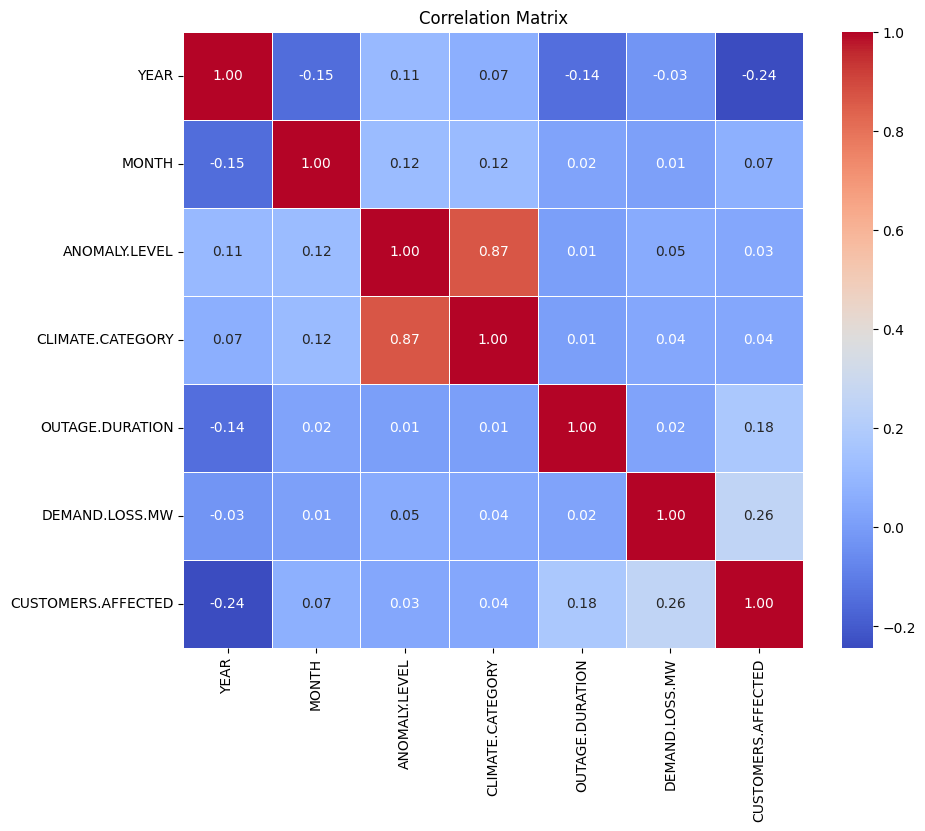

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

array([[<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'MONTH'}>,
        <AxesSubplot:title={'center':'ANOMALY.LEVEL'}>],
       [<AxesSubplot:title={'center':'CLIMATE.CATEGORY'}>,
        <AxesSubplot:title={'center':'OUTAGE.DURATION'}>,
        <AxesSubplot:title={'center':'DEMAND.LOSS.MW'}>],
       [<AxesSubplot:title={'center':'CUSTOMERS.AFFECTED'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

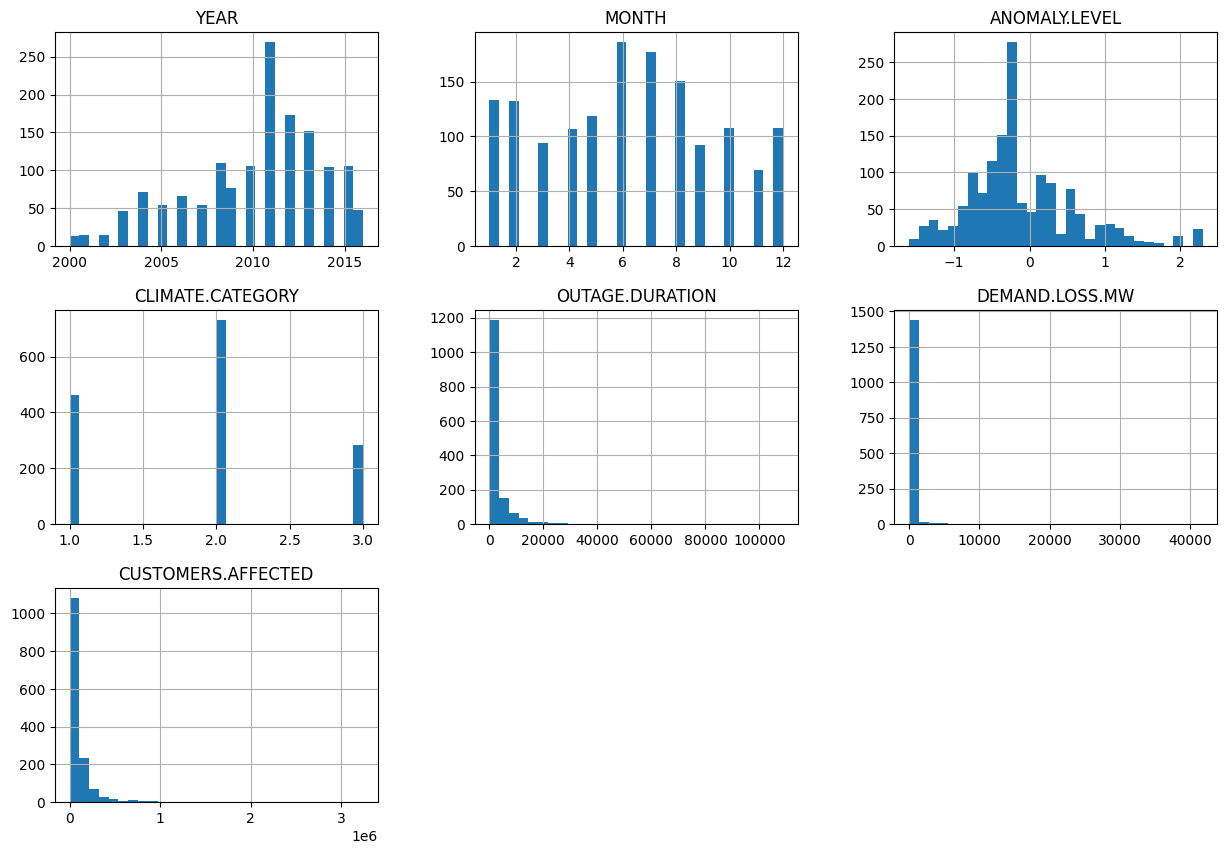

In [61]:
data.hist(bins=30, figsize=(15, 10))


In [62]:
state_mapping = {
        'Alabama': 0,
        'Alaska': 1,
        'Arizona': 2,
        'Arkansas': 3,
        'California': 4,
        'Colorado': 5,
        'Connecticut': 6,
        'Delaware': 7,
        'Florida': 8,
        'Georgia': 9,
        'Hawaii': 10,
        'Idaho': 11,
        'Illinois': 12,
        'Indiana': 13,
        'Iowa': 14,
        'Kansas': 15,
        'Kentucky': 16,
        'Louisiana': 17,
        'Maine': 18,
        'Maryland': 19,
        'Massachusetts': 20,
        'Michigan': 21,
        'Minnesota': 22,
        'Mississippi': 23,
        'Missouri': 24,
        'Montana': 25,
        'Nebraska': 26,
        'Nevada': 27,
        'New Hampshire': 28,
        'New Jersey': 29,
        'New Mexico': 30,
        'New York': 31,
        'North Carolina': 32,
        'North Dakota': 33,
        'Ohio': 34,
        'Oklahoma': 35,
        'Oregon': 36,
        'Pennsylvania': 37,
        'Rhode Island': 38,
        'South Carolina': 39,
        'South Dakota': 40,
        'Tennessee': 41,
        'Texas': 42,
        'Utah': 43,
        'Vermont': 44,
        'Virginia': 45,
        'Washington': 46,
        'West Virginia': 47,
        'Wisconsin': 48,
        'Wyoming': 49,
        'District of Columbia': 50,
    }

In [63]:
data['U.S._STATE'] = data['U.S._STATE'].replace(state_mapping)

In [64]:
data_encoded = pd.get_dummies(data, columns=['U.S._STATE'])

In [65]:
data.dtypes

YEAR                    int64
MONTH                 float64
U.S._STATE              int64
CLIMATE.REGION         object
ANOMALY.LEVEL         float64
CLIMATE.CATEGORY        int64
CAUSE.CATEGORY         object
OUTAGE.DURATION       float64
DEMAND.LOSS.MW        float64
CUSTOMERS.AFFECTED      int32
OUTAGE.SEVERITY        object
dtype: object

In [66]:
data.value_counts('U.S._STATE')

U.S._STATE
4     198
42    122
21     95
46     89
31     70
19     58
37     57
8      45
12     44
34     42
13     42
43     41
7      40
32     39
17     38
45     36
29     32
41     31
2      25
36     25
3      25
35     22
48     19
6      18
20     18
18     18
9      17
24     15
22     15
5      14
28     14
16     13
50     10
44      9
14      8
11      8
30      8
39      8
27      7
15      7
49      6
0       5
10      5
26      4
47      4
23      4
25      3
40      2
33      1
dtype: int64

In [67]:
data.dtypes

YEAR                    int64
MONTH                 float64
U.S._STATE              int64
CLIMATE.REGION         object
ANOMALY.LEVEL         float64
CLIMATE.CATEGORY        int64
CAUSE.CATEGORY         object
OUTAGE.DURATION       float64
DEMAND.LOSS.MW        float64
CUSTOMERS.AFFECTED      int32
OUTAGE.SEVERITY        object
dtype: object

In [68]:
data['U.S._STATE'] = data['U.S._STATE'].astype(int)

In [69]:
data.dtypes

YEAR                    int64
MONTH                 float64
U.S._STATE              int32
CLIMATE.REGION         object
ANOMALY.LEVEL         float64
CLIMATE.CATEGORY        int64
CAUSE.CATEGORY         object
OUTAGE.DURATION       float64
DEMAND.LOSS.MW        float64
CUSTOMERS.AFFECTED      int32
OUTAGE.SEVERITY        object
dtype: object

In [70]:
data.value_counts('CLIMATE.REGION')

CLIMATE.REGION
Northeast             344
South                 218
West                  205
Central               191
Southeast             150
East North Central    137
Northwest             122
Southwest              88
West North Central     16
701.0                   5
dtype: int64

In [71]:
climate_mapping = {
    'Northeast': 1,            
    'Central': 2,              
    'South': 3,                
    'West': 4,                  
    'Southeast': 5,           
    'Northwest': 6,            
    'East North Central': 7,   
    'Southwest': 8,               
    'West North Central': 9,     
    '679.0': 10,                    
}

In [72]:
data['CLIMATE.REGION'] = data['CLIMATE.REGION'].replace(climate_mapping)

In [73]:
data['CLIMATE.REGION'] = data['CLIMATE.REGION'].astype(int)

In [74]:
data.dtypes

YEAR                    int64
MONTH                 float64
U.S._STATE              int32
CLIMATE.REGION          int32
ANOMALY.LEVEL         float64
CLIMATE.CATEGORY        int64
CAUSE.CATEGORY         object
OUTAGE.DURATION       float64
DEMAND.LOSS.MW        float64
CUSTOMERS.AFFECTED      int32
OUTAGE.SEVERITY        object
dtype: object

In [75]:
data.value_counts('CAUSE.CATEGORY')

CAUSE.CATEGORY
severe weather                   744
intentional attack               403
system operability disruption    123
public appeal                     69
equipment failure                 55
islanding                         44
fuel supply emergency             38
dtype: int64

In [76]:
cause_mapping = {
    'severe weather': 1,
    'intentional attack': 2,
    'equipment failure': 3,
    'system operability disruption': 4,
    'fuel supply emergency': 5,
    'islanding': 6,
    'public appeal': 7,
}

In [77]:
data['CAUSE.CATEGORY'] = data['CAUSE.CATEGORY'].replace(cause_mapping)

In [78]:
data['CAUSE.CATEGORY'] = data['CAUSE.CATEGORY'].astype(int)

In [79]:
data.dtypes

YEAR                    int64
MONTH                 float64
U.S._STATE              int32
CLIMATE.REGION          int32
ANOMALY.LEVEL         float64
CLIMATE.CATEGORY        int64
CAUSE.CATEGORY          int32
OUTAGE.DURATION       float64
DEMAND.LOSS.MW        float64
CUSTOMERS.AFFECTED      int32
OUTAGE.SEVERITY        object
dtype: object

In [80]:
severity_mapping = {
    'Minor': 1,
    'Major': 2,
}

In [81]:
data['OUTAGE.SEVERITY'] = data['OUTAGE.SEVERITY'].replace(severity_mapping)

In [82]:
data['OUTAGE.SEVERITY'] = data['OUTAGE.SEVERITY'].astype(int)

In [83]:
data.dtypes

YEAR                    int64
MONTH                 float64
U.S._STATE              int32
CLIMATE.REGION          int32
ANOMALY.LEVEL         float64
CLIMATE.CATEGORY        int64
CAUSE.CATEGORY          int32
OUTAGE.DURATION       float64
DEMAND.LOSS.MW        float64
CUSTOMERS.AFFECTED      int32
OUTAGE.SEVERITY         int32
dtype: object

In [84]:
data.dtypes

YEAR                    int64
MONTH                 float64
U.S._STATE              int32
CLIMATE.REGION          int32
ANOMALY.LEVEL         float64
CLIMATE.CATEGORY        int64
CAUSE.CATEGORY          int32
OUTAGE.DURATION       float64
DEMAND.LOSS.MW        float64
CUSTOMERS.AFFECTED      int32
OUTAGE.SEVERITY         int32
dtype: object

In [85]:
data['CUSTOMERS.AFFECTED'].describe()

count      1476.00
mean     103307.62
std      252113.78
min           0.00
25%         701.00
50%       35115.00
75%      115125.00
max     3241437.00
Name: CUSTOMERS.AFFECTED, dtype: float64

In [86]:
import numpy as np
data['CUSTOMERS.AFFECTED'] = np.log1p(data['CUSTOMERS.AFFECTED'])

In [87]:
data['CUSTOMERS.AFFECTED'].describe()

count   1476.00
mean       8.38
std        4.16
min        0.00
25%        6.55
50%       10.47
75%       11.65
max       14.99
Name: CUSTOMERS.AFFECTED, dtype: float64

# Predictive Analysis

# Random Forest

MSE: 2.314271806678416
R^2: 0.8604128085855823


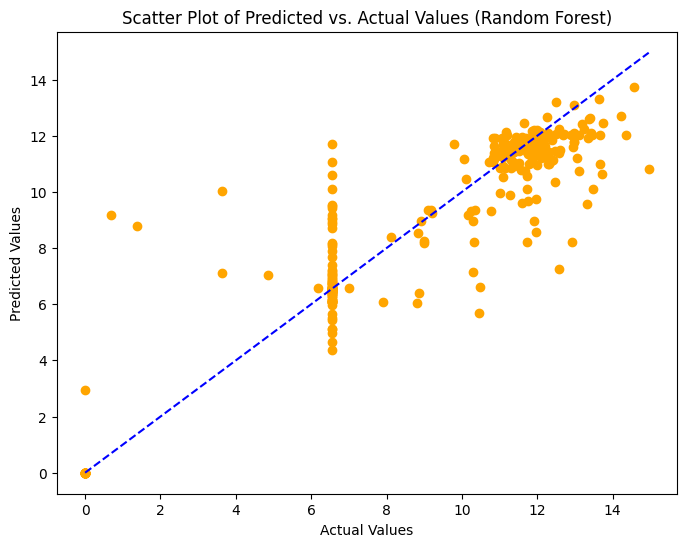

Mean Squared Error: 2.314271806678416
R-squared: 0.8604128085855823


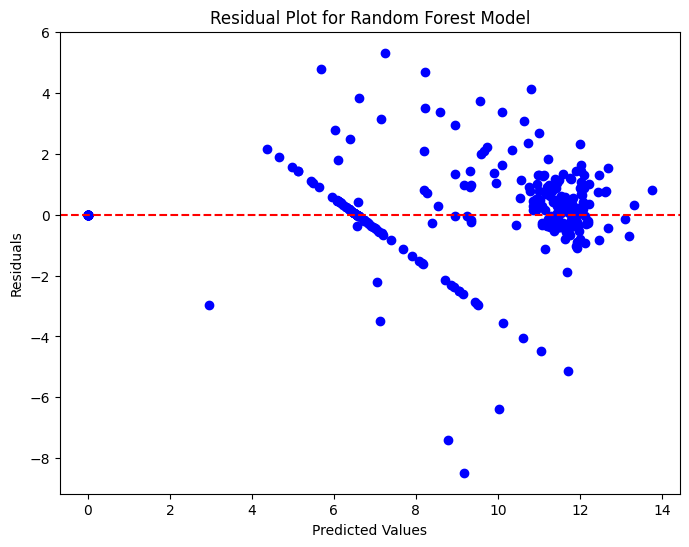

Mean Squared Error: 2.314271806678416
R-squared: 0.8604128085855823


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop('CUSTOMERS.AFFECTED', axis=1)

y = data['CUSTOMERS.AFFECTED']

# Split the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Predicted vs. Actual Values (Random Forest)")
plt.show()


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


residuals = y_test - y_pred


plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Random Forest Model")
plt.show()


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



# Neural Network

MSE: 4.616382692223029
R^2: 0.7215591130471379


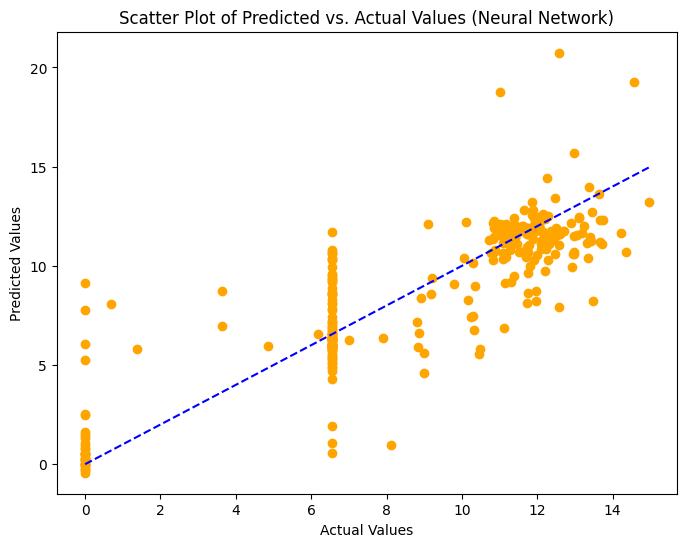

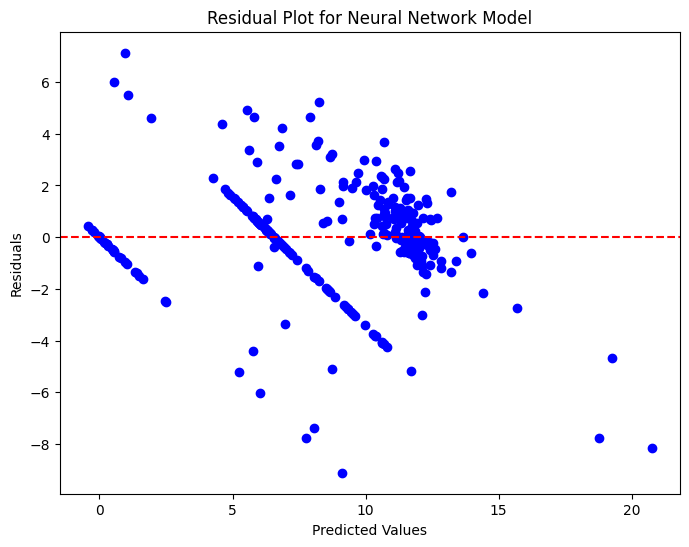

Mean Squared Error: 4.616382692223029
R-squared: 0.7215591130471379


In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

X = data.drop('CUSTOMERS.AFFECTED', axis=1)

y = data['CUSTOMERS.AFFECTED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

neural_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='sgd', max_iter=2000, random_state=42)

neural_model.fit(X_train_scaled, y_train)

y_pred = neural_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)


# Create a scatter plot of Predicted vs. Actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Predicted vs. Actual Values (Neural Network)")
plt.show()


# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Neural Network Model")
plt.show()
# Calculate and print MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)





# Linear Regression

MSE: 12.440518904835795
R^2: 0.24963995644211756


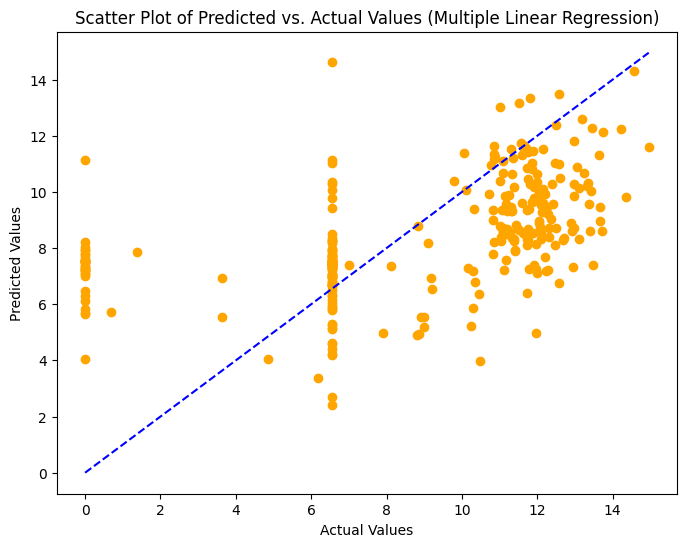

Mean Squared Error: 12.440518904835795
R-squared: 0.24963995644211756


In [90]:
from sklearn.linear_model import LinearRegression

X = data.drop('CUSTOMERS.AFFECTED', axis=1)

y = data['CUSTOMERS.AFFECTED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Predicted vs. Actual Values (Multiple Linear Regression)")
plt.show()

# Calculate and print MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)






# KNN

In [91]:
from sklearn.neighbors import KNeighborsRegressor

X = data.drop('CUSTOMERS.AFFECTED', axis=1)
y = data['CUSTOMERS.AFFECTED']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn_model = KNeighborsRegressor(n_neighbors=5)  
knn_model.fit(X_train, y_train)


y_pred_knn = knn_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

print("k-Nearest Neighbors Regression Results:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)



k-Nearest Neighbors Regression Results:
Mean Squared Error: 7.365790886760139
R-squared: 0.5557263155253777


# RF Seperate X variables

In [92]:

X = data.drop('CUSTOMERS.AFFECTED', axis=1)
y = data['CUSTOMERS.AFFECTED']


results_table = []


for feature in X.columns:
   
    X_single_feature = X[[feature]]

    
    X_train, X_test, y_train, y_test = train_test_split(X_single_feature, y, test_size=0.2, random_state=42)

    
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

 
    y_pred_rf = rf_model.predict(X_test)

   
    mse = mean_squared_error(y_test, y_pred_rf)
    r2 = r2_score(y_test, y_pred_rf)

  
    results_table.append([feature, mse, r2])


results_df = pd.DataFrame(results_table, columns=['Feature', 'MSE', 'R-squared'])
print(results_df)


            Feature   MSE  R-squared
0              YEAR 13.94       0.16
1             MONTH 16.66      -0.00
2        U.S._STATE 13.23       0.20
3    CLIMATE.REGION 15.99       0.04
4     ANOMALY.LEVEL 16.29       0.02
5  CLIMATE.CATEGORY 16.65      -0.00
6    CAUSE.CATEGORY  6.89       0.58
7   OUTAGE.DURATION 13.11       0.21
8    DEMAND.LOSS.MW  7.18       0.57
9   OUTAGE.SEVERITY 16.41       0.01


# KNN Seperate X

In [93]:

X = data.drop('CUSTOMERS.AFFECTED', axis=1)
y = data['CUSTOMERS.AFFECTED']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


results_table = []


for feature in X.columns:
    X_train_var = X_train[[feature]]
    X_test_var = X_test[[feature]]

  
    knn_model = KNeighborsRegressor(n_neighbors=180)  
    knn_model.fit(X_train_var, y_train)

   
    y_pred_var = knn_model.predict(X_test_var)

    
    mse = mean_squared_error(y_test, y_pred_var)
    r2 = r2_score(y_test, y_pred_var)

    
    results_table.append([feature, mse, r2])


results_df = pd.DataFrame(results_table, columns=['Feature', 'MSE', 'R-squared'])
print(results_df)

            Feature   MSE  R-squared
0              YEAR 14.04       0.15
1             MONTH 16.53       0.00
2        U.S._STATE 16.33       0.02
3    CLIMATE.REGION 16.20       0.02
4     ANOMALY.LEVEL 16.06       0.03
5  CLIMATE.CATEGORY 16.79      -0.01
6    CAUSE.CATEGORY  7.02       0.58
7   OUTAGE.DURATION 10.79       0.35
8    DEMAND.LOSS.MW  8.61       0.48
9   OUTAGE.SEVERITY 16.76      -0.01


# Linear Seperate X

In [94]:

X = data.drop('CUSTOMERS.AFFECTED', axis=1)
y = data['CUSTOMERS.AFFECTED']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


results_table = []


for feature in X.columns:
    X_train_var = X_train[[feature]]
    X_test_var = X_test[[feature]]

    
    lr_model = LinearRegression()
    lr_model.fit(X_train_var, y_train)

   
    y_pred_var = lr_model.predict(X_test_var)

   
    mse = mean_squared_error(y_test, y_pred_var)
    r2 = r2_score(y_test, y_pred_var)

    
    results_table.append([feature, mse, r2])


results_df = pd.DataFrame(results_table, columns=['Feature', 'MSE', 'R-squared'])
print(results_df)

            Feature   MSE  R-squared
0              YEAR 14.95       0.10
1             MONTH 16.50       0.00
2        U.S._STATE 16.69      -0.01
3    CLIMATE.REGION 16.62      -0.00
4     ANOMALY.LEVEL 16.71      -0.01
5  CLIMATE.CATEGORY 16.66      -0.00
6    CAUSE.CATEGORY 14.68       0.11
7   OUTAGE.DURATION 16.39       0.01
8    DEMAND.LOSS.MW 16.25       0.02
9   OUTAGE.SEVERITY 16.42       0.01


# NN Seperate X

In [95]:
X = data.drop('CUSTOMERS.AFFECTED', axis=1)
y = data['CUSTOMERS.AFFECTED']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


results_table = []


for feature in X.columns:
    X_train_var = X_train[[feature]]
    X_test_var = X_test[[feature]]

    
    nn_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=2000, random_state=42)
    nn_model.fit(X_train_var, y_train)

    
    y_pred_var = nn_model.predict(X_test_var)

    
    mse = mean_squared_error(y_test, y_pred_var)
    r2 = r2_score(y_test, y_pred_var)

    results_table.append([feature, mse, r2])


results_df = pd.DataFrame(results_table, columns=['Feature', 'MSE', 'R-squared'])
print(results_df)


            Feature    MSE  R-squared
0              YEAR  16.77      -0.01
1             MONTH  16.55       0.00
2        U.S._STATE  16.73      -0.01
3    CLIMATE.REGION  16.87      -0.02
4     ANOMALY.LEVEL  16.40       0.01
5  CLIMATE.CATEGORY  16.66      -0.00
6    CAUSE.CATEGORY   8.08       0.51
7   OUTAGE.DURATION 237.38     -13.32
8    DEMAND.LOSS.MW 134.50      -7.11
9   OUTAGE.SEVERITY  16.42       0.01


# Tables

| Model | MSE | R-squared |
|-------|-----|-----------|
| Neural Network    | 4.62 | 0.72 |
| Random Forest   | 2.31 | 0.86 |
| Multiple LR   |12.44 | 0.25  |
| KNN Model    |7.36 | 0.55 |

| Feature          |   MSE |   R-squared |
|------------------|-------|-------------|
| YEAR             | 13.94 |        0.16 |
| MONTH            | 16.66 |        0.00 |
| U.S._STATE       | 13.23 |        0.20 |
| CLIMATE.REGION   | 15.99 |        0.04 |
| ANOMALY.LEVEL    | 16.29 |        0.02 |
| CLIMATE.CATEGORY | 16.65 |        0.00 |
| CAUSE.CATEGORY   |  6.89 |        0.58 |
| OUTAGE.DURATION  | 13.11 |        0.21 |
| DEMAND.LOSS.MW   |  7.18 |        0.57 |
| OUTAGE.SEVERITY  | 16.41 |        0.01 |


In [96]:
data['CUSTOMERS.AFFECTED'].describe()

count   1476.00
mean       8.38
std        4.16
min        0.00
25%        6.55
50%       10.47
75%       11.65
max       14.99
Name: CUSTOMERS.AFFECTED, dtype: float64

#Visualizations

# Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate

median_customers_affected = data['CUSTOMERS.AFFECTED'].median()
data['CUSTOMERS.AFFECTED'] = data['CUSTOMERS.AFFECTED'].apply(lambda x: 1 if x >= median_customers_affected else 0)
X = data.drop('CUSTOMERS.AFFECTED', axis=1)
y = data['CUSTOMERS.AFFECTED']


train_results_table = []
test_results_table = []


for column in X.columns:
    
    X_feature = X[[column]]

    
    X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=42)

    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    
    logistic_model = LogisticRegression(random_state=42)
    logistic_model.fit(X_train_scaled, y_train)
    y_train_pred_logistic = logistic_model.predict(X_train_scaled)
    y_pred_logistic = logistic_model.predict(X_test_scaled)

    
    train_accuracy = accuracy_score(y_train, y_train_pred_logistic)
    train_precision = precision_score(y_train, y_train_pred_logistic)
    train_recall = recall_score(y_train, y_train_pred_logistic)
    train_f1 = f1_score(y_train, y_train_pred_logistic)

    test_accuracy = accuracy_score(y_test, y_pred_logistic)
    test_precision = precision_score(y_test, y_pred_logistic)
    test_recall = recall_score(y_test, y_pred_logistic)
    test_f1 = f1_score(y_test, y_pred_logistic)

    
    train_results_table.append([column, f"{train_accuracy:.2f}", f"{train_precision:.2f}", f"{train_recall:.2f}", f"{train_f1:.2f}"])
    test_results_table.append([column, f"{test_accuracy:.2f}", f"{test_precision:.2f}", f"{test_recall:.2f}", f"{test_f1:.2f}"])


print("Train Results:")
print(tabulate(train_results_table, headers=['Feature', 'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score'], tablefmt='grid'))
print("\n")


print("Test Results:")
print(tabulate(test_results_table, headers=['Feature', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score'], tablefmt='grid'))

Train Results:
+------------------+------------------+-------------------+----------------+------------------+
| Feature          |   Train Accuracy |   Train Precision |   Train Recall |   Train F1 Score |
+==================+==================+===================+================+==================+
| YEAR             |             0.67 |              0.7  |           0.6  |             0.64 |
+------------------+------------------+-------------------+----------------+------------------+
| MONTH            |             0.54 |              0.54 |           0.52 |             0.53 |
+------------------+------------------+-------------------+----------------+------------------+
| U.S._STATE       |             0.5  |              0.5  |           0.49 |             0.5  |
+------------------+------------------+-------------------+----------------+------------------+
| CLIMATE.REGION   |             0.5  |              0.5  |           1    |             0.67 |
+------------------+-----

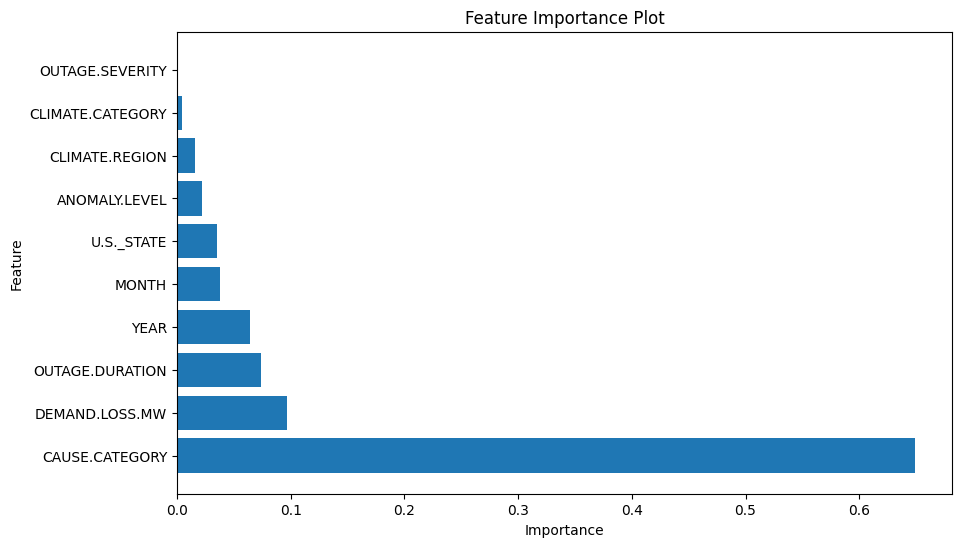

In [103]:

X = data.drop('CUSTOMERS.AFFECTED', axis=1)


y = data['CUSTOMERS.AFFECTED']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators = 100  
model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
model.fit(X_train, y_train)


feature_importances = model.feature_importances_


importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()


C:\Users\SamCr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


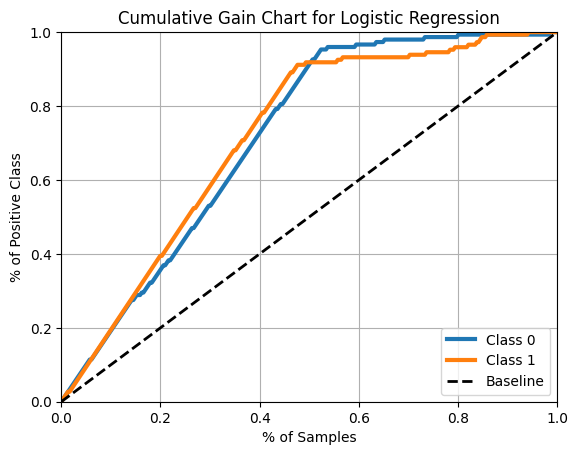

In [105]:
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split




X = data.drop('CUSTOMERS.AFFECTED', axis=1)

y = data['CUSTOMERS.AFFECTED']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_prob = model.predict_proba(X_test)


skplt.metrics.plot_cumulative_gain(y_test, y_prob)
plt.xlabel('% of Samples')
plt.ylabel('% of Positive Class')
plt.title('Cumulative Gain Chart for Logistic Regression')
plt.show()



C:\Users\SamCr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SamCr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 800x600 with 0 Axes>

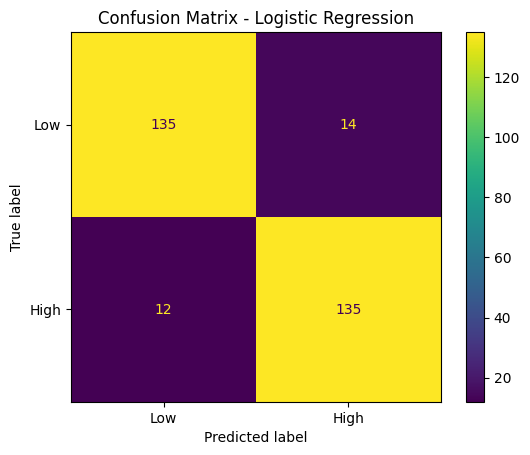

In [106]:

from sklearn.metrics import confusion_matrix, plot_confusion_matrix




X = data.drop('CUSTOMERS.AFFECTED', axis=1)


y = data['CUSTOMERS.AFFECTED']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(model, X_test, y_test, display_labels=['Low', 'High'])
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
